## Exploratory Data Analysis on Indian Economy

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
# from pandas.core.series import Series
# from pandas.io.formats.style import Styler
import seaborn as sns
import plotly.express as px

## use display for html output
from IPython.display import display, HTML

# auto-reload modules
%load_ext autoreload
%autoreload 2

# set pandas display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 1000)

# set dark theme
plt.style.use('dark_background')
px.defaults.template = 'plotly_dark'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('./indianEco.csv')
df.head()

,Year,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           61 non-null     int64  
 1   Country Name                                   61 non-null     object 
 2   GDP (current US$)                              61 non-null     float64
 3    GDP per capita (current US$)                  61 non-null     int64  
 4   GDP growth (annual %)                          61 non-null     float64
 5   Imports of goods and services (% of GDP)       61 non-null     float64
 6   Exports of goods and services (% of GDP)       61 non-null     float64
 7    Total reserves (includes gold, current US$)   61 non-null     float64
 8   Inflation, consumer prices (annual %)          61 non-null     float64
 9   Population, total                              61 non-nu

In [19]:
df.describe()

,year,gdp_current_usdollar,gdp_per_capita_current_usdollar,gdp_growth_annual_percentage,imports_of_goods_and_services_percentage_of_gdp,exports_of_goods_and_services_percentage_of_gdp,total_reserves_includes_gold_current_usdollar,inflation_consumer_prices_annual_percentage,population_total,population_growth_annual_percentage,life_expectancy_at_birth_total_years
count,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,61.000000
mean,1990.000000,6.584725e+11,575.557377,4.938197,12.746393,10.885574,9.802227e+10,7.413279,8.913946e+08,1.927705,57.146230
std,17.752934,8.129606e+11,584.079062,3.344891,8.155110,7.060458,1.497102e+11,4.940153,2.974496e+08,0.419024,8.459559
min,1960.000000,3.702988e+10,82.000000,-7.250000,3.710000,3.310000,4.991451e+08,-7.630000,4.459546e+08,0.960000,41.130000
25%,1975.000000,9.952590e+10,161.000000,3.720000,6.590000,5.200000,2.324650e+09,4.010000,6.235242e+08,1.620000,50.630000
50%,1990.000000,2.882084e+11,340.000000,5.530000,8.570000,7.050000,1.151174e+10,6.670000,8.704522e+08,2.150000,57.660000
75%,2005.000000,8.203816e+11,715.000000,7.450000,19.640000,18.690000,1.378248e+11,10.020000,1.154639e+09,2.260000,64.310000
max,2020.000000,2.831552e+12,2101.000000,9.630000,31.260000,25.430000,5.902274e+11,28.600000,1.396387e+09,2.340000,69.730000


In [12]:
def clean_name(name: str):
  return (name
      .strip()
      .lower()
      .replace(' ', '_')
      .replace('(', '_')
      .replace(')', '')
      .replace('__', '_')
      .replace('%', 'percentage')
      .replace('$', 'dollar')
      # remove all the special chars except (underscore)
      .translate(str.maketrans('', '', '''"'!#$%&'*+,-./:;<=>?@[\]^`{|}~'''))
      .strip('_')
      )
old_name_new_name_dict = {old_name: clean_name(old_name) for old_name in df.columns}
df.rename(columns=old_name_new_name_dict, inplace=True)

In [37]:
df.drop(columns=['country_name'], inplace=True)
df.head()

,year,gdp_current_usdollar,gdp_per_capita_current_usdollar,gdp_growth_annual_percentage,imports_of_goods_and_services_percentage_of_gdp,exports_of_goods_and_services_percentage_of_gdp,total_reserves_includes_gold_current_usdollar,inflation_consumer_prices_annual_percentage,population_total,population_growth_annual_percentage,life_expectancy_at_birth_total_years
0,1960,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57


In [33]:
fig = px.line(df, x='year', y='gdp_per_capita_current_usdollar',
              title='GDP over the years')
fig.add_bar(x=df['year'], y=df['gdp_per_capita_current_usdollar'])
fig.show()


In [50]:
fig = px.line(df, x='year', y='gdp_growth_annual_percentage', title='GDP Growth over the years')
fig.add_bar(x=df['year'], y=df['gdp_growth_annual_percentage'], marker_color='#a0c0f0')
fig.show()

In [52]:
fig = px.line(df, x='year', y=['imports_of_goods_and_services_percentage_of_gdp',
              'exports_of_goods_and_services_percentage_of_gdp'], title='Imports and exports over the years')
fig.show()

<AxesSubplot: >

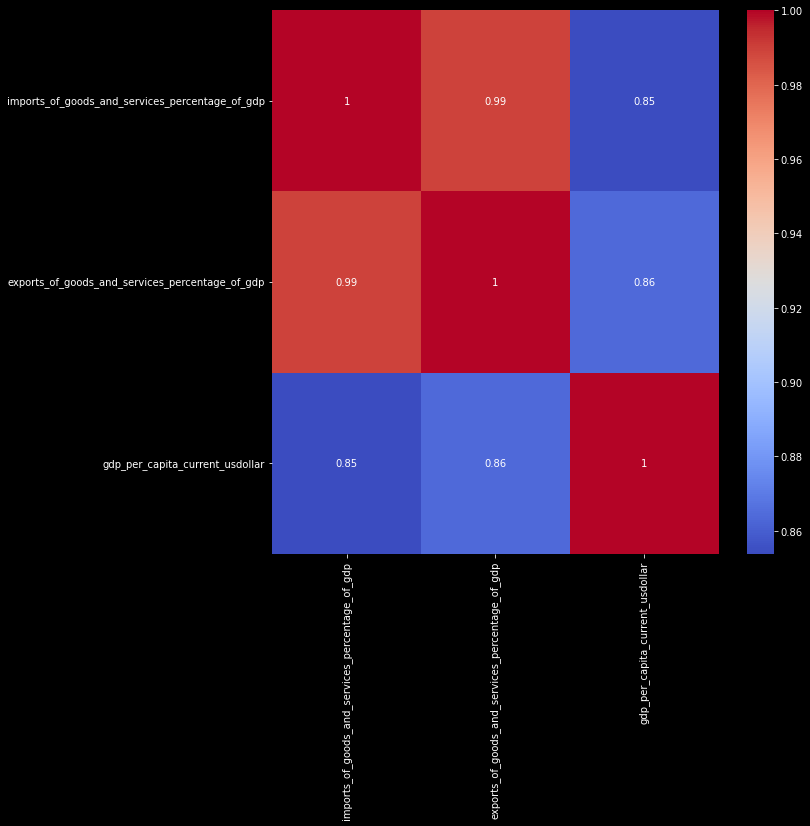

In [56]:
# corr between imports and exports and gdp
corr = df[['imports_of_goods_and_services_percentage_of_gdp',
    'exports_of_goods_and_services_percentage_of_gdp',
    'gdp_per_capita_current_usdollar']].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the above observations that maybe gdp growth is correlated to imports and the exports. So, we can plot a scatter plot to see the correlation between the two.

In [58]:
# gdp bar plot
fig = px.bar(df, x='year', y='gdp_growth_annual_percentage',
             title='GDP per capita over the years')
fig.add_scatter(x=df['year'], y=df['imports_of_goods_and_services_percentage_of_gdp'], mode='lines', name='imports')
fig.add_scatter(x=df['year'], y=df['exports_of_goods_and_services_percentage_of_gdp'], mode='lines', name='exports')
fig.show()

## Forecasting GDP Growth

In [69]:
# split the data 
train = df[df['year'] < 2015]
test = df[df['year'] >= 2015]

In [70]:
# plot both train and test data 
fig = px.bar(train, x='year', y='gdp_per_capita_current_usdollar', title='Train Test Split')
fig.add_bar(x=test['year'], y=test['gdp_per_capita_current_usdollar'], name='test')
fig.show()

In [75]:
import xgboost 
from sklearn.metrics import mean_squared_error, mean_absolute_error

def split_and_dim_red(df: pd.DataFrame):
    df = df.copy()
    train = df[df['year'] < 2015]
    test = df[df['year'] >= 2015]
    # reduce the dimensionality of gdp growth
    x_train = train.drop(columns=['gdp_per_capita_current_usdollar'])
    y_train = train['gdp_per_capita_current_usdollar']
    x_test = test.drop(columns=['gdp_per_capita_current_usdollar'])
    y_test = test['gdp_per_capita_current_usdollar']
    return x_train, y_train, x_test, y_test

X, y, X_test, y_test = split_and_dim_red(df)

# train the model
xgb = xgboost.XGBRegressor(n_estimators=1000, early_stopping_rounds=5, learning_rate=0.01)
xgb.fit(X, y, eval_set=[(X, y), (X_test, y_test)], verbose=True)

# predict on test data
Y_pred = xgb.predict(X_test)

# plot the predictions
fig = px.line(test, x='year', y='gdp_per_capita_current_usdollar', title='Predictions')
fig.add_scatter(x=test['year'], y=Y_pred, mode='lines', name='predictions')
fig.show()

[0]	validation_0-rmse:583.04710	validation_1-rmse:1887.22022
[1]	validation_0-rmse:577.98618	validation_1-rmse:1876.51675
[2]	validation_0-rmse:572.97437	validation_1-rmse:1865.91099
[3]	validation_0-rmse:568.01127	validation_1-rmse:1855.40210
[4]	validation_0-rmse:563.09644	validation_1-rmse:1844.98933
[5]	validation_0-rmse:558.22902	validation_1-rmse:1834.67172
[6]	validation_0-rmse:553.40836	validation_1-rmse:1824.44830
[7]	validation_0-rmse:548.63413	validation_1-rmse:1814.31838
[8]	validation_0-rmse:543.87278	validation_1-rmse:1803.90503
[9]	validation_0-rmse:539.15631	validation_1-rmse:1793.58590
[10]	validation_0-rmse:534.48435	validation_1-rmse:1783.36015
[11]	validation_0-rmse:529.88631	validation_1-rmse:1773.58857
[12]	validation_0-rmse:525.30112	validation_1-rmse:1763.54383
[13]	validation_0-rmse:520.75922	validation_1-rmse:1753.59001
[14]	validation_0-rmse:516.26026	validation_1-rmse:1743.72627
[15]	validation_0-rmse:511.83238	validation_1-rmse:1734.30066
[16]	validation_0-